In [1]:
import pandas as pd
import numpy as np

url1 = 'https://raw.githubusercontent.com/foorilla/freshremote-work-salaries/main/salaries.csv'
url2 = 'https://raw.githubusercontent.com/edb-313/BDTA-Project/main/Data/Salaries.csv'

df = pd.concat([pd.read_csv(url1),pd.read_csv(url2)])

# Data Cleaning

In [2]:
# Define the keywords to filter for
keywords = ['Data', 'Machine learning','AI']

# Join the keywords into a single string separated by pipe characters
keywords_str = '|'.join(keywords)

# Filter the 'job_title' column for rows containing the keywords
df = df[df['job_title'].str.contains(keywords_str)]

In [3]:
#removing duplicates if there are
df = df.drop_duplicates()

In [4]:
#Only fulltime employees (FT)
df = df[df['employment_type'] == "FT"]

In [5]:
#remove unneccesary columns
df = df.drop(['salary','salary_currency','Unnamed: 0','employment_type'],axis = 1)

In [6]:
#resetting the index
df = df.reset_index(drop=True)

In [7]:
#grouping Job titles into Job Groups
i = 0
for t in df['job_title']:
    if 'Analyst' in t or 'Analytics' in t:
        df.at[i,'job_group'] = 'Data Analyst'
    elif 'Learning' in t or 'AI' in t:
        df.at[i,'job_group'] = 'Machine Learning'
    elif 'Engineer' in t or 'ETL' in t:
        df.at[i,'job_group'] = 'Data Engineer'
    elif 'Science' in t or 'Scientist' in t:
        df.at[i,'job_group'] = 'Data Science'
    elif 'Architect' in t:
        df.at[i,'job_group'] = 'Data Architect'
    else:
        df.at[i,'job_group'] = 'Head of Data'
    i += 1

In [8]:
df

,work_year,experience_level,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group
0,2022,MI,Data Analyst,200000,FR,100,US,L,Data Analyst
1,2022,SE,Data Engineer,220000,US,100,US,M,Data Engineer
2,2022,SE,Data Engineer,146000,US,100,US,M,Data Engineer
3,2022,SE,Data Engineer,144000,US,100,US,M,Data Engineer
4,2022,SE,Data Engineer,216000,US,100,US,M,Data Engineer
...,...,...,...,...,...,...,...,...,...
1202,2022,SE,Data Engineer,154000,US,100,US,M,Data Engineer
1203,2022,SE,Data Engineer,126000,US,100,US,M,Data Engineer
1204,2022,SE,Data Analyst,129000,US,0,US,M,Data Analyst
1205,2022,SE,Data Analyst,150000,US,100,US,M,Data Analyst


# Data Visualizations

#### 1. Rank in descending order the average salary of Data Scientists by country (regardless of job title and experience level)

In [9]:
country_counts = df['company_location'].value_counts()
country_counts

US    791
GB     85
CA     49
DE     43
IN     40
ES     30
FR     28
GR     18
AU      8
AT      7
BR      7
PL      6
TR      6
PT      6
SG      5
MX      5
NG      4
LU      4
NL      4
DK      4
PK      3
JP      3
CL      3
NZ      3
RU      3
AS      3
HU      3
MT      2
KE      2
RO      2
UA      2
IL      2
AR      2
EE      2
SI      2
BE      2
PR      2
CH      2
MY      2
AE      1
IR      1
MD      1
HN      1
DZ      1
IE      1
IT      1
CZ      1
ID      1
PH      1
SK      1
VN      1
Name: company_location, dtype: int64

In [10]:
# Filter the dataframe to keep only the rows for countries_to_keep
df_country_count = df[df['company_location'].isin(country_counts[country_counts >= 10].index)]

In [11]:
# Calculate the average salary by country and sort in descending order
avg_salary_country = df_country_count.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=True)

Text(0.5, 1.0, 'Top 5 Countries with Highest Average Salary for Data Scientists')

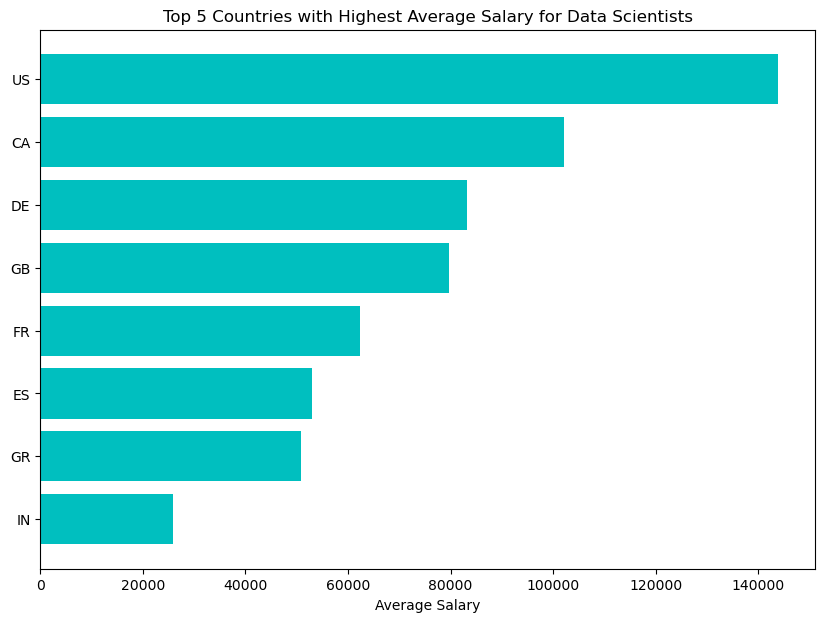

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(avg_salary_country.index, avg_salary_country.values, color='c')

# Set the x-axis label
ax.set_xlabel('Average Salary')

# Set the title of the plot
ax.set_title('Top 5 Countries with Highest Average Salary for Data Scientists')


#### 2. Rank in descending order the average salary of Data Scientists by job title & job group 

In [13]:
titles_count = df['job_title'].value_counts()
titles_count

Data Engineer                    321
Data Scientist                   318
Data Analyst                     214
Data Science Manager              39
Data Architect                    36
BI Data Analyst                   18
AI Scientist                      16
Data Science Consultant           15
Big Data Engineer                 15
Data Analytics Manager            13
Business Data Analyst             13
Director of Data Science          12
Lead Data Engineer                11
Principal Data Scientist          11
Database Reliability Engineer     10
Head of Data                      10
Data Engineering Manager          10
Applied Data Scientist            10
Data Analytics Engineer            9
Lead Data Scientist                8
Data Specialist                    7
Database Administrator             7
Head of Data Science               6
Data Science Engineer              6
Lead Data Analyst                  6
Cloud Data Engineer                5
Principal Data Engineer            5
D

In [14]:
# Filter the dataframe to keep only the titles that appear 5 or more times
df_titles_count = df[df['job_title'].isin(titles_counts[titles_counts >= 5].index)]

NameError: name 'titles_counts' is not defined

In [ ]:
avg_salary_title = df_titles_count.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=True)

# Select the top 10 titles with the highest average salary
top_10_titles = avg_salary_title[:9]

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(top_10_titles.index, top_10_titles.values, color=['blue','red','red','red','black','red','red','yellow','blue'])

#ax.legend(['blue', 'red', 'yellow','black'], ['Engineer', 'Data Scientist', 'Head of Data','Data Architect'])
# Set the x-axis label
ax.set_xlabel('Average Salary')

# Set the title of the plot
ax.set_title('Top 10 titles with Highest Average Salary')


In [ ]:
group_count = df['job_group'].value_counts()
group_count

In [ ]:
avg_salary_group = df.groupby('job_group')['salary_in_usd'].mean().sort_values(ascending=True)

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(avg_salary_group.index, avg_salary_group.values, color=['blue'])

# Set the x-axis label
ax.set_xlabel('Average Salary')

# Set the title of the plot
ax.set_title('Groups with Highest Average Salary')


#### Does the company size affect the average salary (keeping the same experience level and job title)?

In [ ]:
size_counts = df['company_size'].value_counts()

# Print the resulting count for each country
print(size_counts)

In [ ]:
size_mapping = {'S': 1, 'M': 2, 'L': 3}
df['company_size_num'] = df['company_size'].map(size_mapping)

# Calculate the correlation coefficient between company size and salary
correlation = df['company_size_num'].corr(df['salary'])

print('Correlation between company size and salary:', correlation)


In [ ]:
avg_salary_size = df.groupby('company_size_num')['salary'].mean()

# Create a bar chart of average salary by company size
fig, ax = plt.subplots(figsize=(10, 7))
ax.bar(avg_salary_size.index, avg_salary_size.values, color='teal')

# Set the x-axis label
ax.set_xlabel('Company Size')
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['S', 'M', 'L'])

# Set the y-axis label
ax.set_ylabel('Average Salary')
# Set the title of the plot
ax.set_title('Average Salary by Company Size for Data Scientists')


# Show the plot
plt.show()

In [ ]:
# Count the number of companies in each size category
size_counts = df['company_size'].value_counts()
# Calculate the total number of companies
total_companies = size_counts.sum()

# Calculate the percentage of companies in each size category
percent_small = size_counts['S'] / total_companies * 100
percent_medium = size_counts['M'] / total_companies * 100
percent_large = size_counts['L'] / total_companies * 100
# Round the percentages to two decimal places and add the percent sign
percent_small_formatted = '{:.2f}%'.format(round(percent_small, 2))
percent_medium_formatted = '{:.2f}%'.format(round(percent_medium, 2))
percent_large_formatted = '{:.2f}%'.format(round(percent_large, 2))

# Print the results
print('Percentage of companies that are small:', percent_small_formatted)
print('Percentage of companies that are medium:', percent_medium_formatted)
print('Percentage of companies that are large:', percent_large_formatted)

In [ ]:
# Calculate the mean remote work ratio by job title
remote_work_ratio = df.groupby('job_title')['remote_ratio'].mean()

# Sort the results in descending order
remote_work_ratio_sorted = remote_work_ratio.sort_values(ascending=False)

# Print the results
print(remote_work_ratio_sorted)

In [ ]:

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.barh(remote_work_ratio_sorted.index, remote_work_ratio_sorted)

# Set the title and labels
ax.set_title('Remote Work Ratio by Job Title')
ax.set_xlabel('Remote Work Ratio (%)')
ax.set_ylabel('Job Title')

#add legend


# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
# Sort the results in descending order
remote_work_ratio_sorted = remote_work_ratio.sort_values(ascending=False)

# Create a color list
colors = ['red' if ratio == 0 else 'orange' if 0 < ratio < 50 else 'green' if ratio == 50 else 'lightseagreen' if 50 <= ratio < 100 else 'blue' if ratio == 100 else 'black' for ratio in remote_work_ratio_sorted.values]

# Create a scatter plot
fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(remote_work_ratio_sorted.values, remote_work_ratio_sorted.index, color=colors)

# Set the title and labels
ax.set_title('Remote Work Ratio by Job Title')
ax.set_xlabel('Remote Work Ratio (%)')
ax.set_ylabel('Job Title')
plt.text(0, 0.05, '0 No remote work (less than 20%) \n50 Partially remote \n100 Fully remote (more than 80%)', transform=plt.gca().transAxes, fontsize=10, verticalalignment='bottom')

# Show the plot
plt.show()

In [ ]:
# Calculate the mean remote work ratio by job title
remote_work_ratio_by_company = df.groupby('company_size')['remote_ratio'].mean()

# Sort the results in descending order
remote_work_ratio_by_company_sorted = remote_work_ratio_by_company.sort_values(ascending=False)

# Print the results
print(remote_work_ratio_by_company_sorted)

#plot a graph
# Create a stem plot of the mean remote work ratio by job title
plt.stem(remote_work_ratio_by_company)



plt.xlabel('Company size')
plt.xticks([0, 1, 2], ['S', 'M', 'L'])
plt.ylabel('Mean Remote Work Ratio')
plt.title('Mean Remote Work Ratio by Company Size')
plt.ylim(65,75)
plt.show()

In [ ]:
# Convert the 'work_year' column to a datetime object
#df['work_year'] = pd.to_datetime(df['work_year'])
df['work_year'] = pd.to_datetime(df['work_year'].astype(str), format='%Y')
# Calculate the annual average salary in USD
annual_avg_salary = df.groupby(df['work_year'].dt.year)['salary_in_usd'].mean()


# Format the yearly dates
yearly_dates = [pd.Period(year=year, freq='A') for year in annual_avg_salary.index]
yearly_dates_formatted = [date.strftime('%Y') for date in yearly_dates]

# Plot the trend of annual average salary
plt.plot(yearly_dates_formatted, annual_avg_salary.values)

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Annual Average Salary (USD)')
plt.title('Trend of Annual Average Salary')




# Calculate the YoY change for each year
yoy_change = annual_avg_salary.pct_change()
yoy_change_formatted = yoy_change[1:].map(lambda x: f"{x:.2%}")
print(yoy_change_formatted)


# Show the plot
plt.show()

In [ ]:
# Group the data by job_title and year, and calculate the average salary for each group
avg_salary_by_job_year = df.groupby(['job_title', df['work_year'].dt.year])['salary_in_usd'].mean()

# Calculate the YoY percentage change for each job_title
yoy_salary_change_by_job = avg_salary_by_job_year.groupby('job_title').pct_change(periods=1)

# Drop missing values
yoy_salary_change_by_job = yoy_salary_change_by_job.dropna()

# Find the job_title with the highest YoY percentage change
highest_yoy_jobs = yoy_salary_change_by_job.groupby('job_title').max().nlargest(10)

# Print the result
print(f"The top 3 job titles with the highest YoY percentage change are:\n{highest_yoy_jobs}")

In [ ]:
avg_salary_by_job_exp = df.groupby(['job_title', 'experience_level'])['salary_in_usd'].mean()
print(avg_salary_by_job_exp)



In [ ]:
# Reset index to make job_title a regular column
avg_salary_by_job_exp = avg_salary_by_job_exp.reset_index()

# Pivot the table to prepare for plotting
pivoted_data = avg_salary_by_job_exp.pivot(index='job_title', columns='experience_level', values='salary_in_usd')

# Reorder the columns
pivoted_data = pivoted_data[['EN', 'MI', 'SE', 'EX']] 

# Plot a stacked bar chart
pivoted_data.plot(kind='bar', stacked=True, figsize=(18,10))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Job Title and Experience Level')
plt.show()